# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Lab Session: 01 - Data Cleaning

### Some contents of this lab are adapted from UC Berkeley's Data100 course

This first lab is meant to introduce you to techniques related to data manipulation and data cleaning.

### Import libraries

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set_theme()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = None
pd.set_option('display.precision', 2)


## Data cleaning

Read Hadley Wickham's _R for Data Science_ book: https://r4ds.had.co.nz/tidy-data.html

### Let's try our first untidy data

In [25]:
ut1 = pd.read_csv('untidy1.csv')
ut1.head()

,country year type count
0,Afghanistan 1999 cases 745
1,Afghanistan 1999 population 19987071
2,Afghanistan 2000 cases 2666
3,Afghanistan 2000 population 20595360
4,Brazil 1999 cases 37737


### Let's try to read in 'untidy1.csv'  the data with a different delimiter 


In [26]:
ut1 = pd.read_csv('untidy1.csv', sep='\\s+')
ut1.head()

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737


### Let's try another untidy dataset

In [27]:
ut2 = pd.read_csv('untidy2.csv')
ut2.head()

,country 1999 2000
0,Afghanistan 745 2666
1,Brazil 37737 80488
2,China 212258 213766


In [28]:
ut2 = pd.read_csv('untidy2.csv', sep="\\s+")
ut2.head()

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


### From the output above we can see that 1999 and 2000 appear as column names. This doesnt look right. Let's use the melt function on these two columns to make it more tidy

Read here about the melt function: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [29]:
ut = ut2.melt(id_vars=['country'], value_vars=['1999', '2000'])
ut.head()

,country,variable,value
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488


### We still need to rename the column, we can do it while melting. 

In [30]:
ut = ut2.melt(id_vars=['country'], value_vars=['1999', '2000'], var_name='year')
ut.head()

,country,year,value
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488


## Let's look at a big untidy dataset 

In [31]:
tb = pd.read_csv('tb.csv')

In [32]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let us take a look at the columns

In [33]:
tb.columns

Index(['country', 'iso2', 'iso3', 'year', 'newrel_m014', 'newrel_m1524',
       'newrel_m2534', 'newrel_m3544', 'newrel_m4554', 'newrel_m5564',
       'newrel_m65', 'newrel_f014', 'newrel_f1524', 'newrel_f2534',
       'newrel_f3544', 'newrel_f4554', 'newrel_f5564', 'newrel_f65'],
      dtype='object')

### The columns names are difficult to understand, let's see the metadata 

In [34]:
tb_meta = pd.read_csv('tb_meta.csv')

In [35]:
tb_meta.head()

,variable_name,dataset,code_list,definition
0,budget_cpp_dstb,Budget,NaN,Average cost of drugs budgeted per patient for...
1,budget_cpp_mdr,Budget,NaN,Average cost of drugs budgeted per patient for...
2,budget_cpp_tpt,Budget,NaN,Average cost of drugs budgeted per patient for...
3,budget_cpp_xdr,Budget,NaN,Average cost of drugs budgeted per patient for...
4,budget_fld,Budget,NaN,Budget required for drugs to treat drug-suscep...


### Let's look at the variables specific to to the columns presnt in tb

In [36]:
curr_meta = tb_meta[tb_meta['variable_name'].isin(tb.columns)]

In [37]:
curr_meta.head()

,variable_name,dataset,code_list,definition
71,country,Country identification,NaN,Country or territory name
74,iso2,Country identification,NaN,ISO 2-character country/territory code
75,iso3,Country identification,NaN,ISO 3-character country/territory code
436,newrel_f014,Notification,NaN,New and relapse cases (but only new cases if r...
440,newrel_f1524,Notification,NaN,New and relapse cases (but only new cases if r...


### the dataset and code_list colunms are not that useful, so we remove them

In [38]:
print(curr_meta.shape)
curr_meta = curr_meta.drop(columns=['dataset', 'code_list'])

(17, 4)


In [39]:
print(curr_meta.shape)
for i in range(curr_meta.shape[0]): 
    entry = curr_meta.iloc[i]
    print(f'{entry.variable_name}: {entry.definition}')

(17, 2)
country: Country or territory name
iso2: ISO 2-character country/territory code
iso3: ISO 3-character country/territory code
newrel_f014: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 0-14 years
newrel_f1524: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 15-24 years
newrel_f2534: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 25-34 years
newrel_f3544: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 35-44 years
newrel_f4554: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 45-54 years
newrel_f5564: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 55-64 years
newrel_f65: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 65 years and over
newrel_m014: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): males aged 0-14 years
newre

### Now we will define some functions to tidy up the tb dataset 

In [40]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
## define a function to drop 'iso2' and 'iso3'
def drop_iso(df):
    new_df = df.drop(columns=['iso2', 'iso3'])
    return new_df

tb_drop_iso = drop_iso(tb)
tb_drop_iso.head(20)

,country,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Afghanistan,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Afghanistan,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Afghanistan,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
## define a function to make a dataframe tidy using pd.melt
## use country and year as id_vars
## set var_name as 'entry'
## set value_name as 'count'

def make_tidy(df):
    new_df = df.melt(id_vars=['country', 'year'], var_name='entry', value_name='count')
    return new_df

tidy_tb = make_tidy(tb_drop_iso)
tidy_tb.head()

,country,year,entry,count
0,Afghanistan,1980,newrel_m014,NaN
1,Afghanistan,1981,newrel_m014,NaN
2,Afghanistan,1982,newrel_m014,NaN
3,Afghanistan,1983,newrel_m014,NaN
4,Afghanistan,1984,newrel_m014,NaN


### We will now introduce some new columns into our dataframe.
We will use the df.assign function. You can read more about it https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html

In [43]:
## define a function to introduce two columns 'sex' and 'agecodes'
## The values of sex and agecodes should be extracted from the 'codes' value defined in the function
## drop the entry column after you are done

def split_entry(df):
    codes = df['entry'].str.split('_').str[-1]
    sex_vals = codes.str[0]
    agecode_val = codes.str[1:]

    new_df = df.assign(sex=sex_vals)
    new_df = new_df.assign(agecode=agecode_val)

    new_df = new_df.drop(columns = ['entry'])

    return new_df

tb_new_columns = split_entry(tidy_tb)
tb_new_columns

,country,year,count,sex,agecode
0,Afghanistan,1980,NaN,m,014
1,Afghanistan,1981,NaN,m,014
2,Afghanistan,1982,NaN,m,014
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65
101358,Zimbabwe,2012,NaN,f,65
101359,Zimbabwe,2013,725.0,f,65


### Now we will define a function to format the age column

In [44]:
def age_from_code(df):
    return df.assign(age=df['agecode'].replace({
        '014': '0-14',
        '04': '0-4',
        '1524': '15-24',
        '2534': '25-34',
        '3544': '35-44',
        '4554': '45-54',
        '5564': '55-64',
        '65': '65+',
    })).drop(columns='agecode')



### Run the code below to see effects of the methods you implemented

We will use the DataFrame.pipe function. You can read more about it here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html

In [45]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
tidy = (tb.pipe(drop_iso)
 .pipe(make_tidy)
 .pipe(split_entry)
 .pipe(age_from_code)
)
tidy

,country,year,count,sex,age
0,Afghanistan,1980,NaN,m,0-14
1,Afghanistan,1981,NaN,m,0-14
2,Afghanistan,1982,NaN,m,0-14
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65+
101358,Zimbabwe,2012,NaN,f,65+
101359,Zimbabwe,2013,725.0,f,65+


### Now there are a lots of NaN value in the dataframe, lets drop them 

In [86]:
# YOUR CODE HERE
df = tidy.dropna()

### Let's select a subset of the data. Select a subset of the data that shows the average number of cases for countries that start with the letter H


In [110]:
# YOUR CODE HERE
H_countries = df.loc[df['country'].str[0] == 'H']

temp_df = H_countries[['country', 'count']]
means = temp_df.groupby(by=['country']).mean()

means

,count
country,
Haiti,1217.14
Honduras,212.93
Hungary,74.29


Tidy data is especially useful for seaborn, the plotting library we will use extensively in this course!

Create a barplot with the subset created. The x-axis should be the count and the y-axis should be the country.

<Axes: xlabel='country', ylabel='count'>

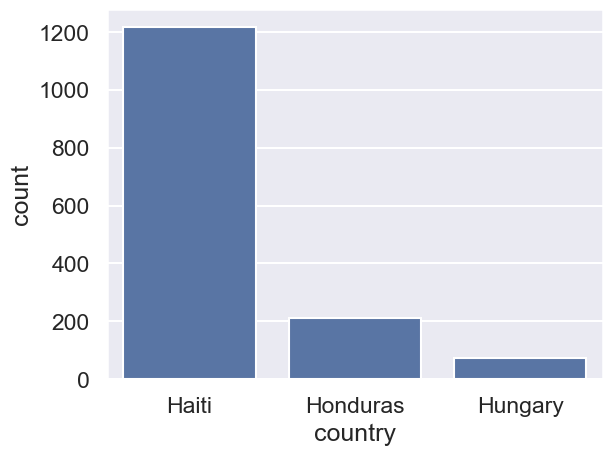

In [120]:
# YOUR CODE HERE
import seaborn as sb

sb.barplot(means['count'])

## Hierarchical Data

A lot of structured data isn't in CSV format, but in HTML, XML, JSON, YAML, etc. JSON might have a structure that Pandas can't read directly.

Here's an example: a group of people collected information about US congressional legislators in YAML format.

https://github.com/unitedstates/congress-legislators

Here's one of the data files:

https://github.com/unitedstates/congress-legislators/blob/master/legislators-current.yaml

In [139]:
import yaml
legislators_path = 'legislators-current.yaml'
legislators = yaml.safe_load(open(legislators_path))
print(len(legislators))
print(len(legislators[0]))
print(legislators[0].keys())

539
4
dict_keys(['id', 'name', 'bio', 'terms'])


As we can see below, the data is mostly stored in several dictionaries. 
Hence, to access the data, we need to access the dictionaries.

In [151]:
legislators[0]

{'id': {'bioguide': 'B000944',
  'thomas': '00136',
  'lis': 'S307',
  'govtrack': 400050,
  'opensecrets': 'N00003535',
  'votesmart': 27018,
  'fec': ['H2OH13033', 'S6OH00163'],
  'cspan': 5051,
  'wikipedia': 'Sherrod Brown',
  'house_history': 9996,
  'ballotpedia': 'Sherrod Brown',
  'maplight': 168,
  'icpsr': 29389,
  'wikidata': 'Q381880',
  'google_entity_id': 'kg:/m/034s80'},
 'name': {'first': 'Sherrod',
  'last': 'Brown',
  'official_full': 'Sherrod Brown'},
 'bio': {'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'},
 'terms': [{'type': 'rep',
   'start': '1993-01-05',
   'end': '1995-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1995-01-04',
   'end': '1997-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1997-01-07',
   'end': '1999-01-03',
   'state': 'OH',
   'district': 13,
   'party': 'Democrat'},
  {'type': 'rep',
   'start': '1999-01-06',
   'end

Let's look at the data pertaining to the first legislator.

In [52]:
x = legislators[0]
x['id']

{'bioguide': 'B000944',
 'thomas': '00136',
 'lis': 'S307',
 'govtrack': 400050,
 'opensecrets': 'N00003535',
 'votesmart': 27018,
 'fec': ['H2OH13033', 'S6OH00163'],
 'cspan': 5051,
 'wikipedia': 'Sherrod Brown',
 'house_history': 9996,
 'ballotpedia': 'Sherrod Brown',
 'maplight': 168,
 'icpsr': 29389,
 'wikidata': 'Q381880',
 'google_entity_id': 'kg:/m/034s80'}

### Retrieve the name of the first legislator

In [153]:
### YOUR CODE HERE
name_legislator_1 = legislators[0]['name']['first'] + ' ' + legislators[0]['name']['last']
print(name_legislator_1)

Sherrod Brown


### Retrieve the bio of the first legislator

In [144]:
### YOUR CODE HERE
print(legislators[0]['bio'])

{'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'}


### Create a function to generate a datetime object from the birthday string associated with a legislator's birthday. Use datetime.strptime(). Test your function on the first legilator, x. You can read more about it here https://www.programiz.com/python-programming/datetime/strptime

In [171]:
### YOUR CODE HERE
from datetime import datetime

def get_birthday_datetime(dict):
    birthdays = [datetime.strptime(dict[i]['bio']['birthday'], "%Y-%m-%d") for i in range(len(dict))]
    return birthdays

birthdays = get_birthday_datetime(legislators)
print(birthdays[0])

1952-11-09 00:00:00


### Create a dataframe called 'leg_df'  that has four columns 'id', 'first', 'last', and 'birthday' for all legislators. 

In [195]:
## YOUR CODE HERE

import numpy as np

data = np.array([
    [legislators[i]['id'] for i in range(len(legislators))],
    [legislators[i]['name']['first'] for i in range(len(legislators))],
    [legislators[i]['name']['last'] for i in range(len(legislators))],
    [birthdays[i] for i in range(len(legislators))]
])

leg_df = pd.DataFrame(data.T, columns = ['id', 'first', 'last', 'birthday'])
leg_df

,id,first,last,birthday
0,"{'bioguide': 'B000944', 'thomas': '00136', 'li...",Sherrod,Brown,1952-11-09
1,"{'bioguide': 'C000127', 'thomas': '00172', 'li...",Maria,Cantwell,1958-10-13
2,"{'bioguide': 'C000141', 'thomas': '00174', 'li...",Benjamin,Cardin,1943-10-05
...,...,...,...,...
536,"{'bioguide': 'R000615', 'fec': ['S4MA00143'], ...",Mitt,Romney,1947-03-12
537,"{'bioguide': 'M001197', 'fec': ['S8AZ00221', '...",Martha,McSally,1966-03-22
538,"{'bioguide': 'G000592', 'fec': ['H8ME02185'], ...",Jared,Golden,1982-07-25


### Calculate the current age of the legistlators in a new column 'age'

In [57]:
### YOUR CODE HERE

### Plot a histogram of the newly created age column

In [58]:
## YOUR CODE HERE

## Missing Values
Thd column religion from the original legistlators dataset has a few missing values. Create a new column in leg_df with the name 'religion' and extract the religion of each legislator for this colum.


In [59]:
### YOUR CODE HERE

### How many null values do we have in the religion column.

In [60]:
### YOUR CODE HERE

### Replace the null values in religion with 'Unknown'

In [61]:
### YOUR CODE HERE

## Merging Dataframes
Now we will look at how to merge dataframes. Lets read in some new data.

In [62]:
comm_path = 'committees-current.yaml'
comm_membership_path = 'committee-membership-current.yaml'

comms = yaml.safe_load(open(comm_path))
comm_membership = yaml.safe_load(open(comm_membership_path))
print(len(comms), len(comm_membership))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 777: character maps to <undefined>

In [ ]:
comms[0]
# thomas_id is a unique reference to the committee 

### Lets create a dataframe from the commitees dataset

In [ ]:
comm_df = pd.DataFrame(
    columns=['name', 'thomas_id', 'type'],
    data=[[c['name'], c['thomas_id'], c['type']] for c in comms]
)
comm_df

### Now let's take a look at the commitee memberships

In [ ]:
comm_membership.keys()

In [ ]:
comm_membership['HSAG'][0]

### Now let's create a dataframe from the commitee memberships dataset

In [ ]:
member_df = pd.DataFrame(
    columns=['comm_id', 'leg_id'],
    data=[[c, m['bioguide']] for c, members in comm_membership.items() for m in members]
)
member_df.head()

### Merge the member-df with comm_df on 'comm_id' and 'thomas_id'. Name it member_comm

Read more about pd.merge here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [ ]:
### YOUR CODE HERE

### Count the number of legistlators belonging to each committee.

In [ ]:
### YOUR CODE HERE

### Merge member_comm with with leg_df on 'leg_id',  and 'id'

In [ ]:
### YOUR CODE HERE

### Compute the average age of legislators in each committee

In [ ]:
### YOUR CODE HERE

## Missing Values

* Drop the data with missing values (we did that for previous examples)
* Estimate the missing value
    1. use mean, median or mode 
    2. Use inference engine to estimate 
    3. Some values should not be estimated (e.g., religion in previous example)
* Zero fill or value fill 

## Random Sampling 

if we use pandas, we can simply use sample function. Read more here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [ ]:
# sample 20% of data from the tidy dataframe
A = tidy.sample(frac=0.2)
print(A.shape, tidy.shape)
# sample 20 data 
B = tidy.sample(n=20)
print(B.shape)

## What if we need to randomly sample images or files. for example files in the current directory?
We can use the Python funtion random. Read more about random here

In [ ]:
import os 
import random 
files = os.listdir(".")

In [ ]:
print(files)

### Files is a list files in your current working directory. Sample 2 random files from your files directiory and print their names.  

In [ ]:
### YOUR CODE HERE

## What if we have to sample data from numpy array 
We can use np.random. Read more about it here https://numpy.org/doc/stable/reference/random/index.html. 

### First use any two np.random functions to generate an array of random numbers

In [ ]:
### YOUR CODE HERE

### Randomly sample 3 elements without replacement

In [ ]:
### YOUR CODE HERE

### Randomly sample 3 elements with replacement

In [ ]:
### YOUR CODE HERE